<a href="https://colab.research.google.com/github/rmontteiro/Machine-Learning/blob/master/Desafio_Mod3_RegLinear_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd #biblioteca para manipulação de dados
import numpy as np #biblioteca para utilizacao de vetores e matrizes
import matplotlib.pyplot as plt #bibloteca para plotar graficos
import seaborn as sns
import datetime

In [2]:
#importando o nosso dataset
from google.colab import files
uploaded = files.upload()

Saving diabetes_numeric.csv to diabetes_numeric.csv


In [3]:
df = pd.read_csv('diabetes_numeric.csv')

In [4]:
df.head()

,age,deficit,c_peptide
0,5.2,-8.1,4.8
1,8.8,-16.1,4.1
2,10.5,-0.9,5.2
3,10.6,-7.8,5.5
4,10.4,-29.0,5.0


In [5]:
# Verificando o numero de amostras (linhas) e features (colunas) do dataset. 
print('Amostras e Features:', df.shape)

Amostras e Features: (43, 3)


In [6]:
# Verificando quais são os tipos das features
df.columns

Index(['age', 'deficit', 'c_peptide'], dtype='object')

In [8]:
#verificando o formato do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43 non-null     float64
 1   deficit    43 non-null     float64
 2   c_peptide  43 non-null     float64
dtypes: float64(3)
memory usage: 1.1 KB


In [9]:
#contando valores nulos 
df.isnull().sum()

age          0
deficit      0
c_peptide    0
dtype: int64

In [10]:
# binarizando a feature week
df = pd.get_dummies(df)

# visualizando o resultado
df.head(5)

,age,deficit,c_peptide
0,5.2,-8.1,4.8
1,8.8,-16.1,4.1
2,10.5,-0.9,5.2
3,10.6,-7.8,5.5
4,10.4,-29.0,5.0


In [11]:
# Analisando o resumo da base
df.describe()

,age,deficit,c_peptide
count,43.000000,43.000000,43.000000
mean,9.032558,-8.148837,4.746512
std,4.022539,7.123080,0.720565
min,0.900000,-29.000000,3.000000
25%,5.500000,-12.700000,4.450000
50%,10.400000,-7.800000,4.900000
75%,11.850000,-2.000000,5.100000
max,15.600000,-0.200000,6.600000


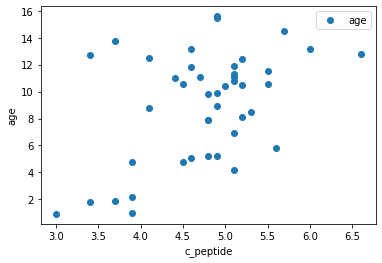

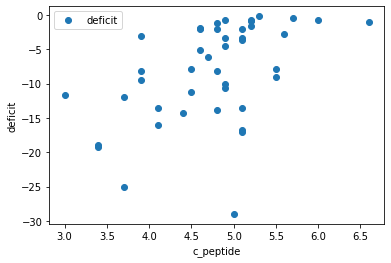

In [25]:
#plotando gráficos de correlação das features
for i in df.columns[0:]:
    if(i != 'c_peptide'):
        df.plot(x = 'c_peptide', y = i, style='o') 
        plt.xlabel('c_peptide')  
        plt.ylabel(i) 
        plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box plot para a exima C_pepitida')

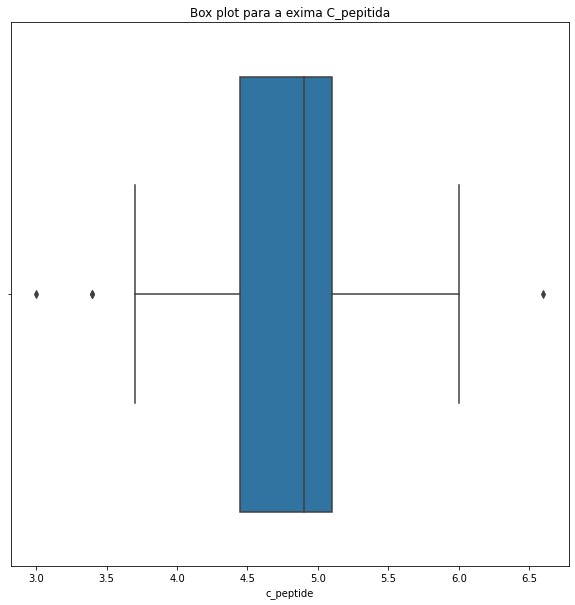

In [24]:
#verificando se existem outliers
plt.figure(figsize=(10, 10))
g = sns.boxplot(df['c_peptide'])  #realiza o plot através da biblioteca seaborn
g.set_title('Box plot para a exima C_pepitida')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box plot para deficit')

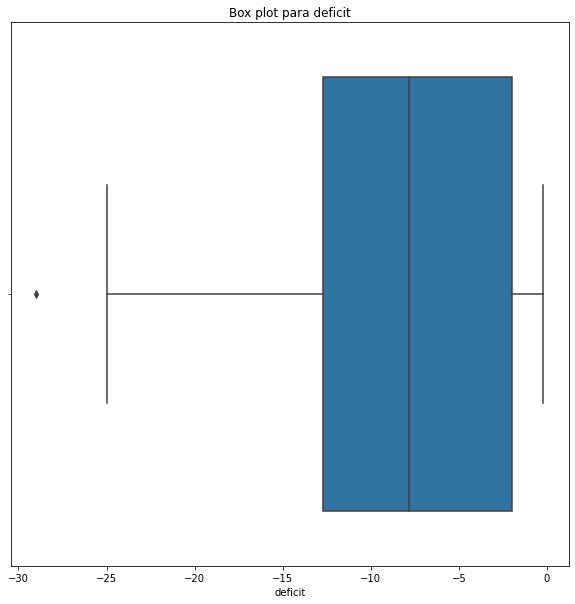

In [28]:
#verificando se existem outliers
plt.figure(figsize=(10, 10))
g = sns.boxplot(df['deficit'])  #realiza o plot através da biblioteca seaborn
g.set_title('Box plot para deficit')

In [30]:
# armazenando os labels em um array
labels = np.array(df['age'])

# salvando a ordem das features
feature_list = list(df.columns)

In [31]:
# convertendo df para array
data = np.array(df)

In [36]:
# importar train_test_split do scikitlearn 
from sklearn.model_selection import train_test_split

# aplicando a funcao train_test_split para separar os conjuntos de treino e 
# teste segundo uma porcentagem de separação definida. 
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.25, random_state = 42)

In [47]:
# criando baseline
baseline_preds = test_data[:, feature_list.index('deficit')]

In [48]:
# importar o modelo de regressão linear
from sklearn.linear_model import LinearRegression 

# treinando o modelo no conjunto de dados de treino
regression = LinearRegression().fit(train_data, train_labels);

In [49]:
# importar biblioteca para calculo de métricas
from sklearn import metrics  

# calculando medidas de erro
# essas medidas são calculadas a partir da comparação com o valor real do nosso conjunto de teste
print('R2:', metrics.r2_score(test_labels, baseline_preds)) 
print('MSE:', metrics.mean_squared_error(test_labels, baseline_preds))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, baseline_preds))) 
print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(test_labels, baseline_preds))) 
print('MAE:', metrics.mean_absolute_error(test_labels, baseline_preds))

R2: -46.220865061923995
MSE: 458.16727272727275
RMSE: 21.404842272889393


ValueError: ignored

In [50]:
# importar o modelo de regressão linear
from sklearn.linear_model import LinearRegression 

# treinando o modelo no conjunto de dados de treino
regression = LinearRegression().fit(train_data, train_labels);

In [51]:

# aplicando o modelo treinado para a previsão da temperatura 
#em todo o conjunto de teste
predictions1_labels = regression.predict(test_data)

# Exibindo dataframe com valores 10 reais e suas respectivas previsões
p = pd.DataFrame({'Real': test_labels, 'Previsto': predictions1_labels})  
p.head(10)

,Real,Previsto
0,13.2,13.2
1,14.5,14.5
2,11.9,11.9
3,6.9,6.9
4,4.8,4.8
5,12.5,12.5
6,10.4,10.4
7,7.9,7.9
8,5.8,5.8
9,10.6,10.6


In [52]:
print('R2:', metrics.r2_score(test_labels, predictions1_labels)) 
print('MSE:', metrics.mean_squared_error(test_labels, predictions1_labels))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, predictions1_labels))) 
print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(test_labels, predictions1_labels))) 
print('MAE:', metrics.mean_absolute_error(test_labels, predictions1_labels))
print('MAPE:', mean_absolute_percentage_error(test_labels, predictions1_labels))

R2: 1.0
MSE: 9.036043096167954e-30
RMSE: 3.0060011803337593e-15
RMSLE: 3.3474483693592255e-16
MAE: 2.745278751800387e-15


NameError: ignored